In [2]:
import os, sys
import time
import datetime
import pandas as pd
import numpy as np
import math
from math import radians, cos, sin, asin, sqrt 
import random


import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.patches import Ellipse, Circle


In [19]:
hexagon_grid_table=pd.read_csv('Dataset/hexagon_grid_table.csv',header=None,
                            names = ['Grid_id','v1_lng','v1_lat',\
                                    'v2_lng','v2_lat',\
                                    'v3_lng','v3_lat',\
                                    'v4_lng','v4_lat',\
                                    'v5_lng','v5_lat',\
                                    'v6_lng','v6_lat'])

hexagon_grid_table=hexagon_grid_table.dropna()


X=list(hexagon_grid_table['v1_lng'])+list(hexagon_grid_table['v2_lng'])+list(hexagon_grid_table['v3_lng'])\
    +list(hexagon_grid_table['v4_lng'])+list(hexagon_grid_table['v5_lng'])+list(hexagon_grid_table['v6_lng'])

Y=list(hexagon_grid_table['v1_lat'])+list(hexagon_grid_table['v2_lat'])+list(hexagon_grid_table['v3_lat'])\
    +list(hexagon_grid_table['v4_lat'])+list(hexagon_grid_table['v5_lat'])+list(hexagon_grid_table['v6_lat'])

print(min(X),min(Y))

102.99358000000001 22.85281


# Conclusion

the Range of provided grids has exceeded the scope of Chengdu

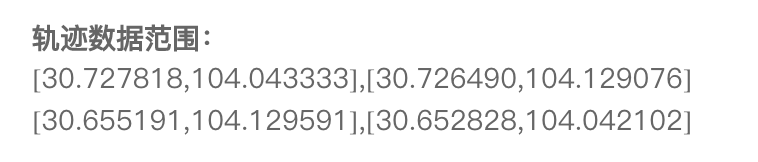


[30.652828,104.042102]


[30.726490,104.129076]



# Figure Plot

In [30]:
southwest=[30.635575, 104.031623]
northeast=[30.730974, 104.133098]


In [31]:
def draw_bkg(sw,ne):
    
    '''Initial parameter'''
    bg_path='Chengdu.png'
    
    '''Figure out'''
    img = plt.imread(bg_path)
    height, width = img.shape[:2]
    h1 = math.ceil(10./width*height)
    fig = plt.figure(figsize=(10,h1))
    ax = fig.add_subplot(111)
    xgrange, ygrange = ((sw[1], ne[1]), (sw[0], ne[0]))
    plt.xlim(xgrange)
    plt.ylim(ygrange)
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    plt.xticks(np.arange(xgrange[0], xgrange[1], 0.352/15))
    plt.yticks(np.arange(ygrange[0], ygrange[1], 0.2415/13))
    try:
        ax.imshow(img, extent=[x0, x1, y0, y1], aspect='auto', alpha=.5)
    except:
        pass
    return fig, ax, xgrange, ygrange

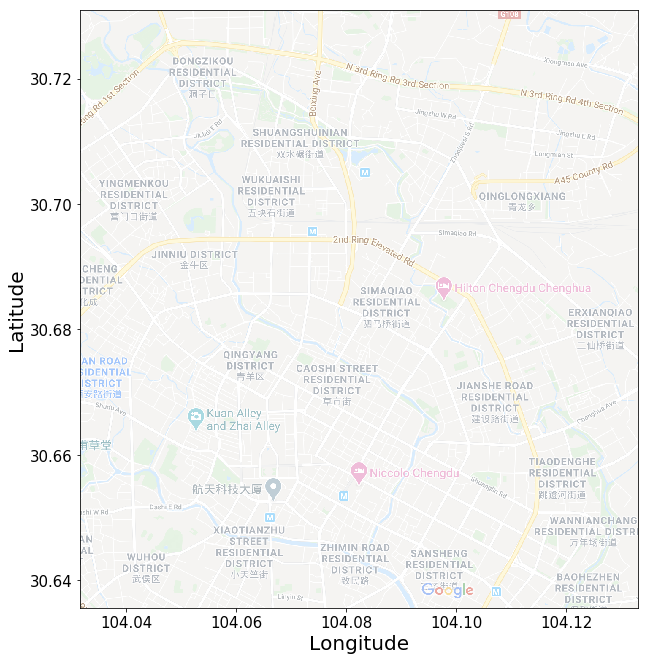

# Data Cleaning

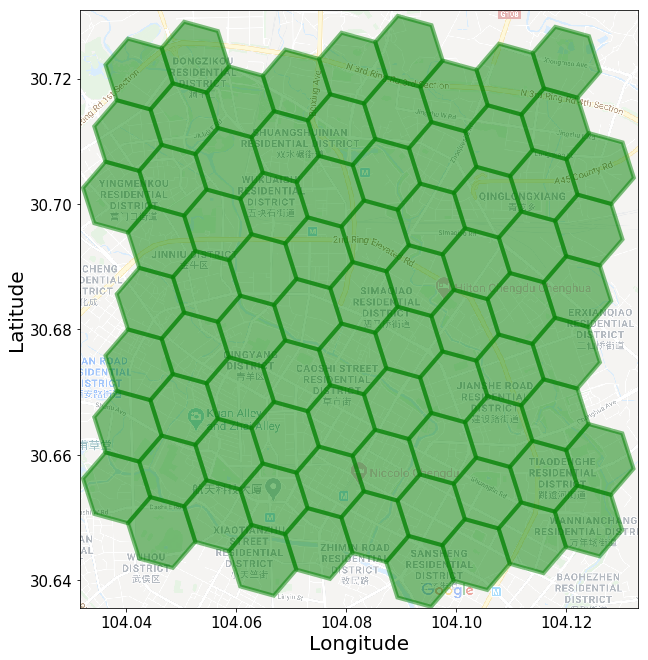

In [39]:
hexagon_grid_table=pd.read_csv('Dataset/hexagon_grid_table.csv',header=None,
                            names = ['Grid_id','v1_lng','v1_lat',\
                                    'v2_lng','v2_lat',\
                                    'v3_lng','v3_lat',\
                                    'v4_lng','v4_lat',\
                                    'v5_lng','v5_lat',\
                                    'v6_lng','v6_lat'])

hexagon_grid_table=hexagon_grid_table.dropna()

hexagon_grid_table=hexagon_grid_table.loc[(hexagon_grid_table['v1_lng']<=northeast[1])&(hexagon_grid_table['v1_lng']>=southwest[1])]

hexagon_grid_table=hexagon_grid_table.loc[(hexagon_grid_table['v2_lng']<=northeast[1])&(hexagon_grid_table['v2_lng']>=southwest[1])]

hexagon_grid_table=hexagon_grid_table.loc[(hexagon_grid_table['v3_lng']<=northeast[1])&(hexagon_grid_table['v3_lng']>=southwest[1])]

hexagon_grid_table=hexagon_grid_table.loc[(hexagon_grid_table['v4_lng']<=northeast[1])&(hexagon_grid_table['v4_lng']>=southwest[1])]

hexagon_grid_table=hexagon_grid_table.loc[(hexagon_grid_table['v5_lng']<=northeast[1])&(hexagon_grid_table['v5_lng']>=southwest[1])]

hexagon_grid_table=hexagon_grid_table.loc[(hexagon_grid_table['v6_lng']<=northeast[1])&(hexagon_grid_table['v6_lng']>=southwest[1])]


hexagon_grid_table=hexagon_grid_table.loc[(hexagon_grid_table['v1_lat']<=northeast[0])&(hexagon_grid_table['v1_lat']>=southwest[0])]

hexagon_grid_table=hexagon_grid_table.loc[(hexagon_grid_table['v2_lat']<=northeast[0])&(hexagon_grid_table['v2_lat']>=southwest[0])]

hexagon_grid_table=hexagon_grid_table.loc[(hexagon_grid_table['v3_lat']<=northeast[0])&(hexagon_grid_table['v3_lat']>=southwest[0])]

hexagon_grid_table=hexagon_grid_table.loc[(hexagon_grid_table['v4_lat']<=northeast[0])&(hexagon_grid_table['v4_lat']>=southwest[0])]

hexagon_grid_table=hexagon_grid_table.loc[(hexagon_grid_table['v5_lat']<=northeast[0])&(hexagon_grid_table['v5_lat']>=southwest[0])]

hexagon_grid_table=hexagon_grid_table.loc[(hexagon_grid_table['v6_lat']<=northeast[0])&(hexagon_grid_table['v6_lat']>=southwest[0])]


hexagon_grid_table



fig, ax, xgrange, ygrange=draw_bkg(southwest,northeast)

'''Axis'''

xmajorLocator   = MultipleLocator(0.02)
ymajorLocator   = MultipleLocator(0.02) 

ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)

for idx,row in hexagon_grid_table.iterrows():


    pgon = plt.Polygon(([row['v1_lng'],row['v1_lat']],\
                        [row['v2_lng'],row['v2_lat']],\
                        [row['v3_lng'],row['v3_lat']],\
                        [row['v4_lng'],row['v4_lat']],\
                        [row['v5_lng'],row['v5_lat']],\
                        [row['v6_lng'],row['v6_lat']]),color='green',linewidth=4,fill=True,alpha=0.5)

    plt.gca().add_patch(pgon)


plt.tick_params(labelsize=15)

labels = ax.get_xticklabels() + ax.get_yticklabels()
font2 = {'weight': 'normal','size': 20}
plt.xlabel('Longitude', font2)
plt.ylabel('Latitude', font2)
plt.xlim((southwest[1], northeast[1]))
plt.ylim((southwest[0], northeast[0]))

plt.show()